In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as wpd

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [ ]:
'''
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
'''

In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [4]:
print end, start

2017-04-09 09:48:51.970679 2016-04-09 00:00:00


In [5]:
for stock in tech_list:
    globals()[stock] = wpd.DataReader(stock, 'yahoo', start, end)

In [6]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,112.959167,113.808095,112.298730,113.126349,3.367346e+07,112.217137
std,14.295354,14.293975,14.371741,14.388670,1.563253e+07,14.880650
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.987502,103.734998,101.832499,102.314999,2.449592e+07,100.806859
50%,110.920002,112.009998,110.040001,111.345001,2.920455e+07,110.491208
75%,118.007498,118.842502,117.572498,118.435000,3.643442e+07,117.669835
max,144.289993,145.460007,143.809998,144.770004,1.146021e+08,144.770004


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-04-11 to 2017-04-07
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


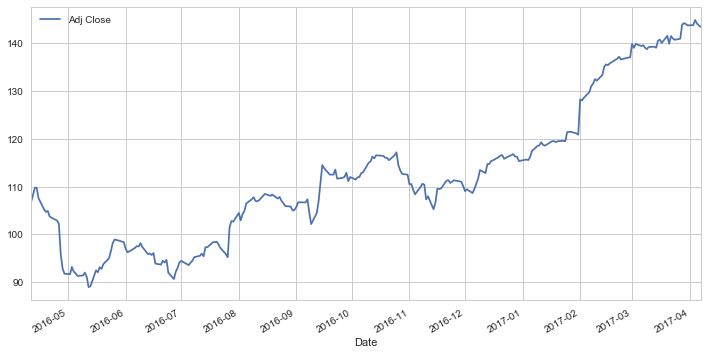

In [8]:
AAPL['Adj Close'].plot(legend=True, figsize=(12,6))

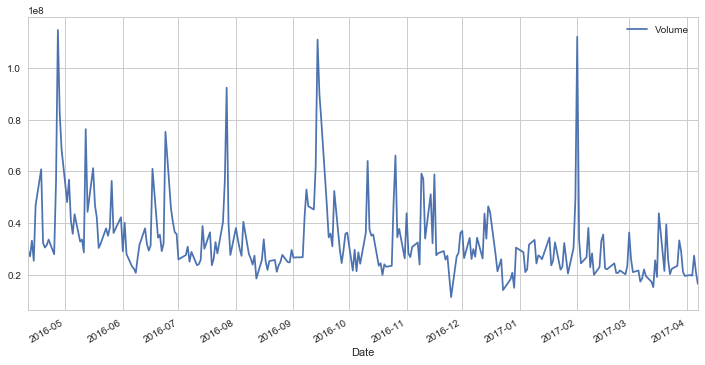

In [9]:
AAPL['Volume'].plot(legend=True, figsize=(12, 6))

In [10]:
# Caculate moving average
ma_days = [10, 30, 60]
for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = Series(AAPL['Adj Close']).rolling(window=ma).mean()

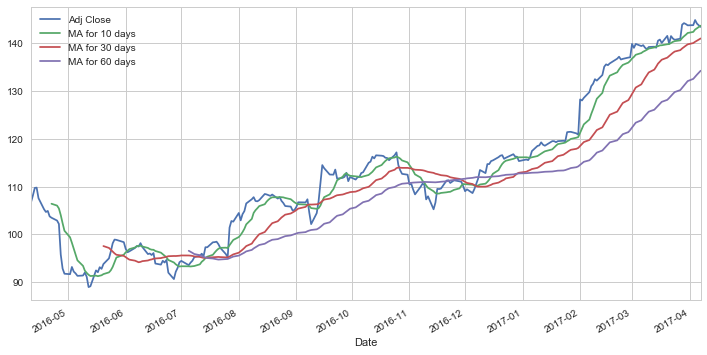

In [11]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(subplots=False, figsize=(12, 6))

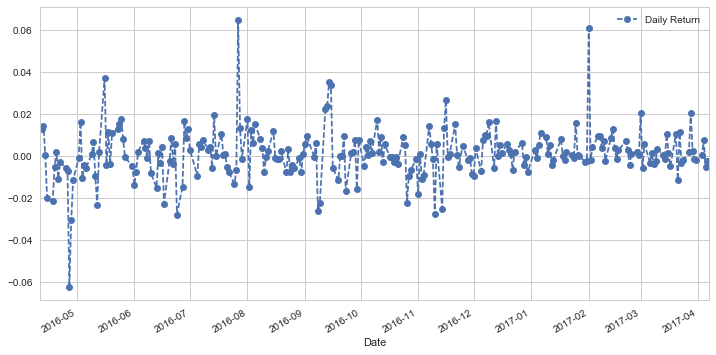

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12, 6), legend=True, linestyle='--', marker='o')

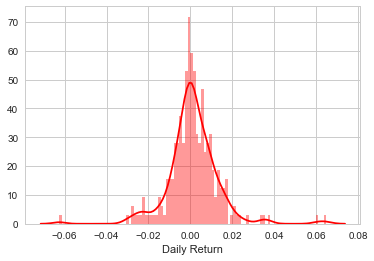

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='red')

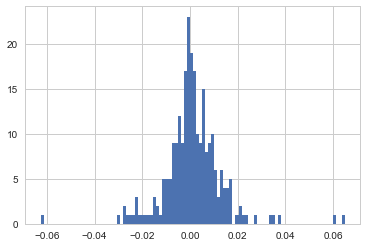

In [14]:
AAPL['Daily Return'].hist(bins=100)

In [15]:
closing_df = wpd.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-11,106.762999,595.929993,736.099976,52.918234
2016-04-12,108.153607,603.169983,743.090027,53.249521
2016-04-13,109.720482,614.820007,751.719971,53.931579
2016-04-14,109.779237,620.750000,753.200012,53.941325
2016-04-15,107.575818,625.890015,759.000000,54.223894


In [17]:
tech_rets = closing_df.pct_change()

tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-11,NaN,NaN,NaN,NaN
2016-04-12,0.013025,0.012149,0.009496,0.006260
2016-04-13,0.014487,0.019315,0.011614,0.012809
2016-04-14,0.000535,0.009645,0.001969,0.000181
2016-04-15,-0.020071,0.008280,0.007700,0.005238


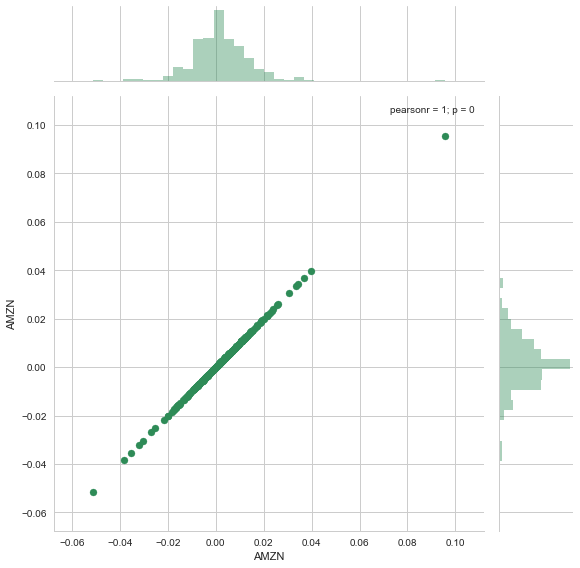

In [18]:
sns.jointplot('AMZN', 'AMZN', tech_rets, kind='scatter', size=8, color='seagreen')

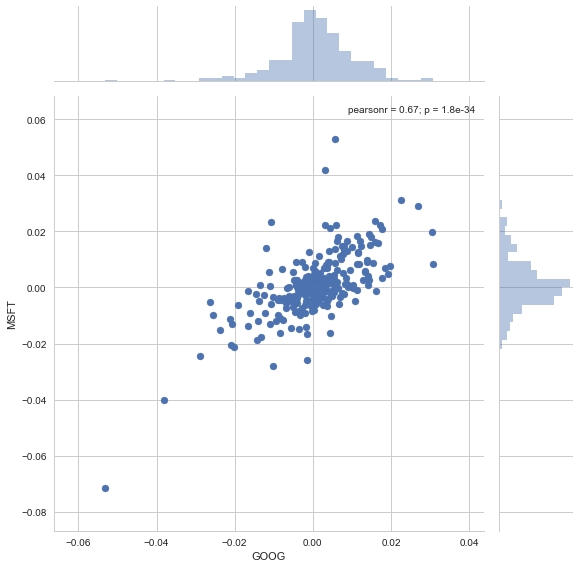

In [19]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', size=8)

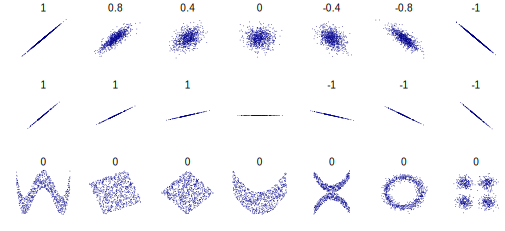

In [20]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

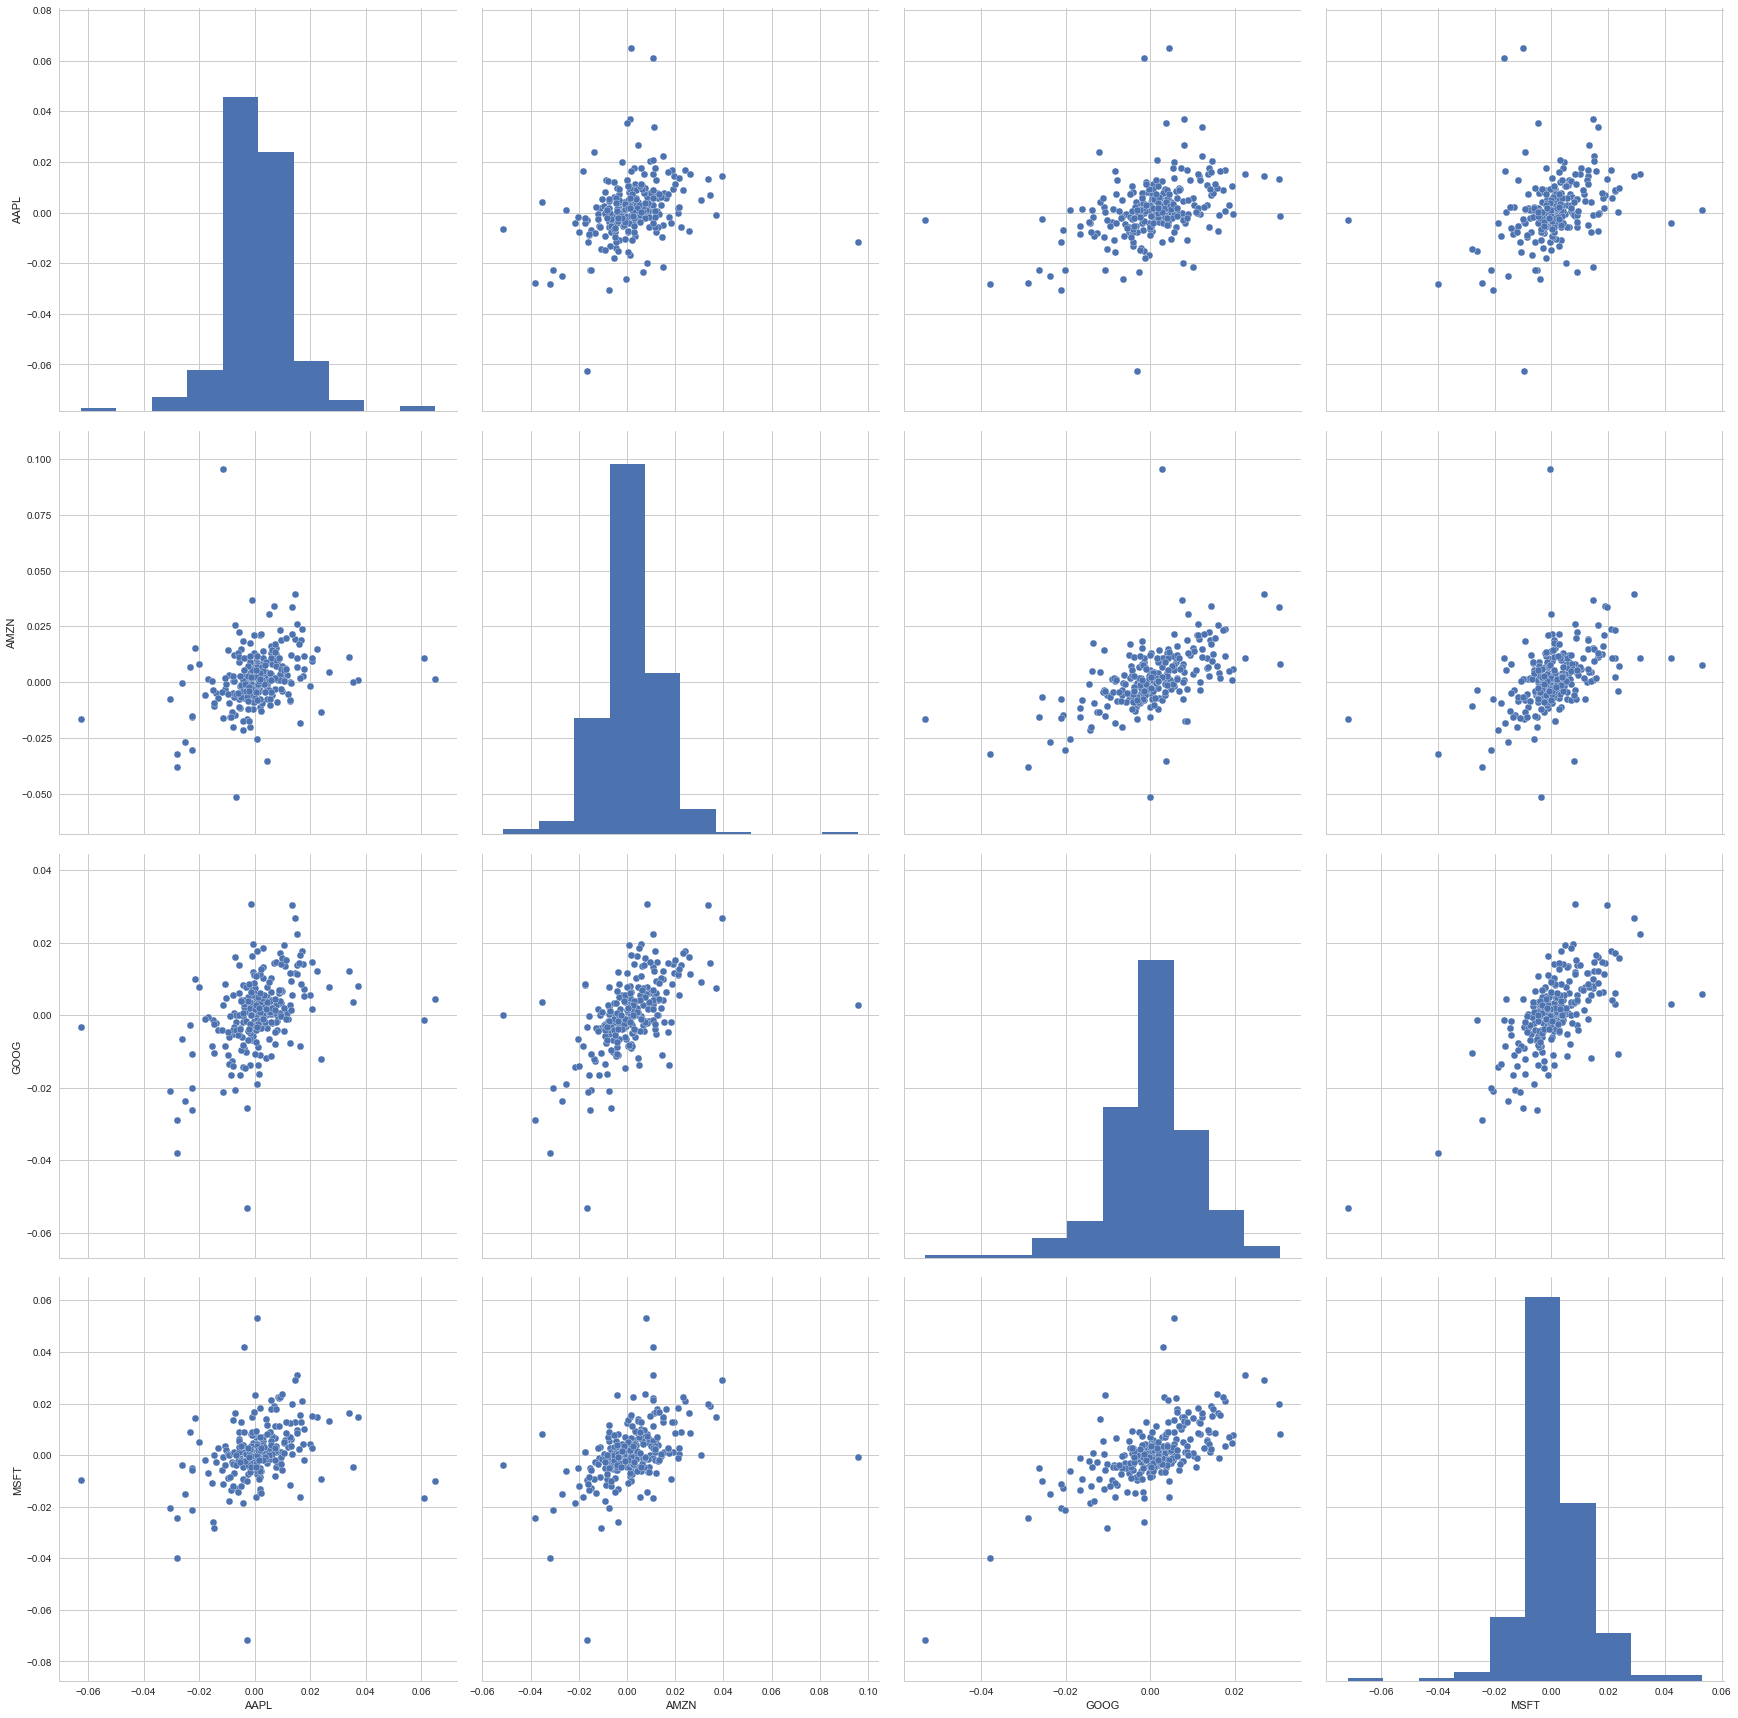

In [21]:
sns.pairplot(tech_rets.dropna(), size=6)

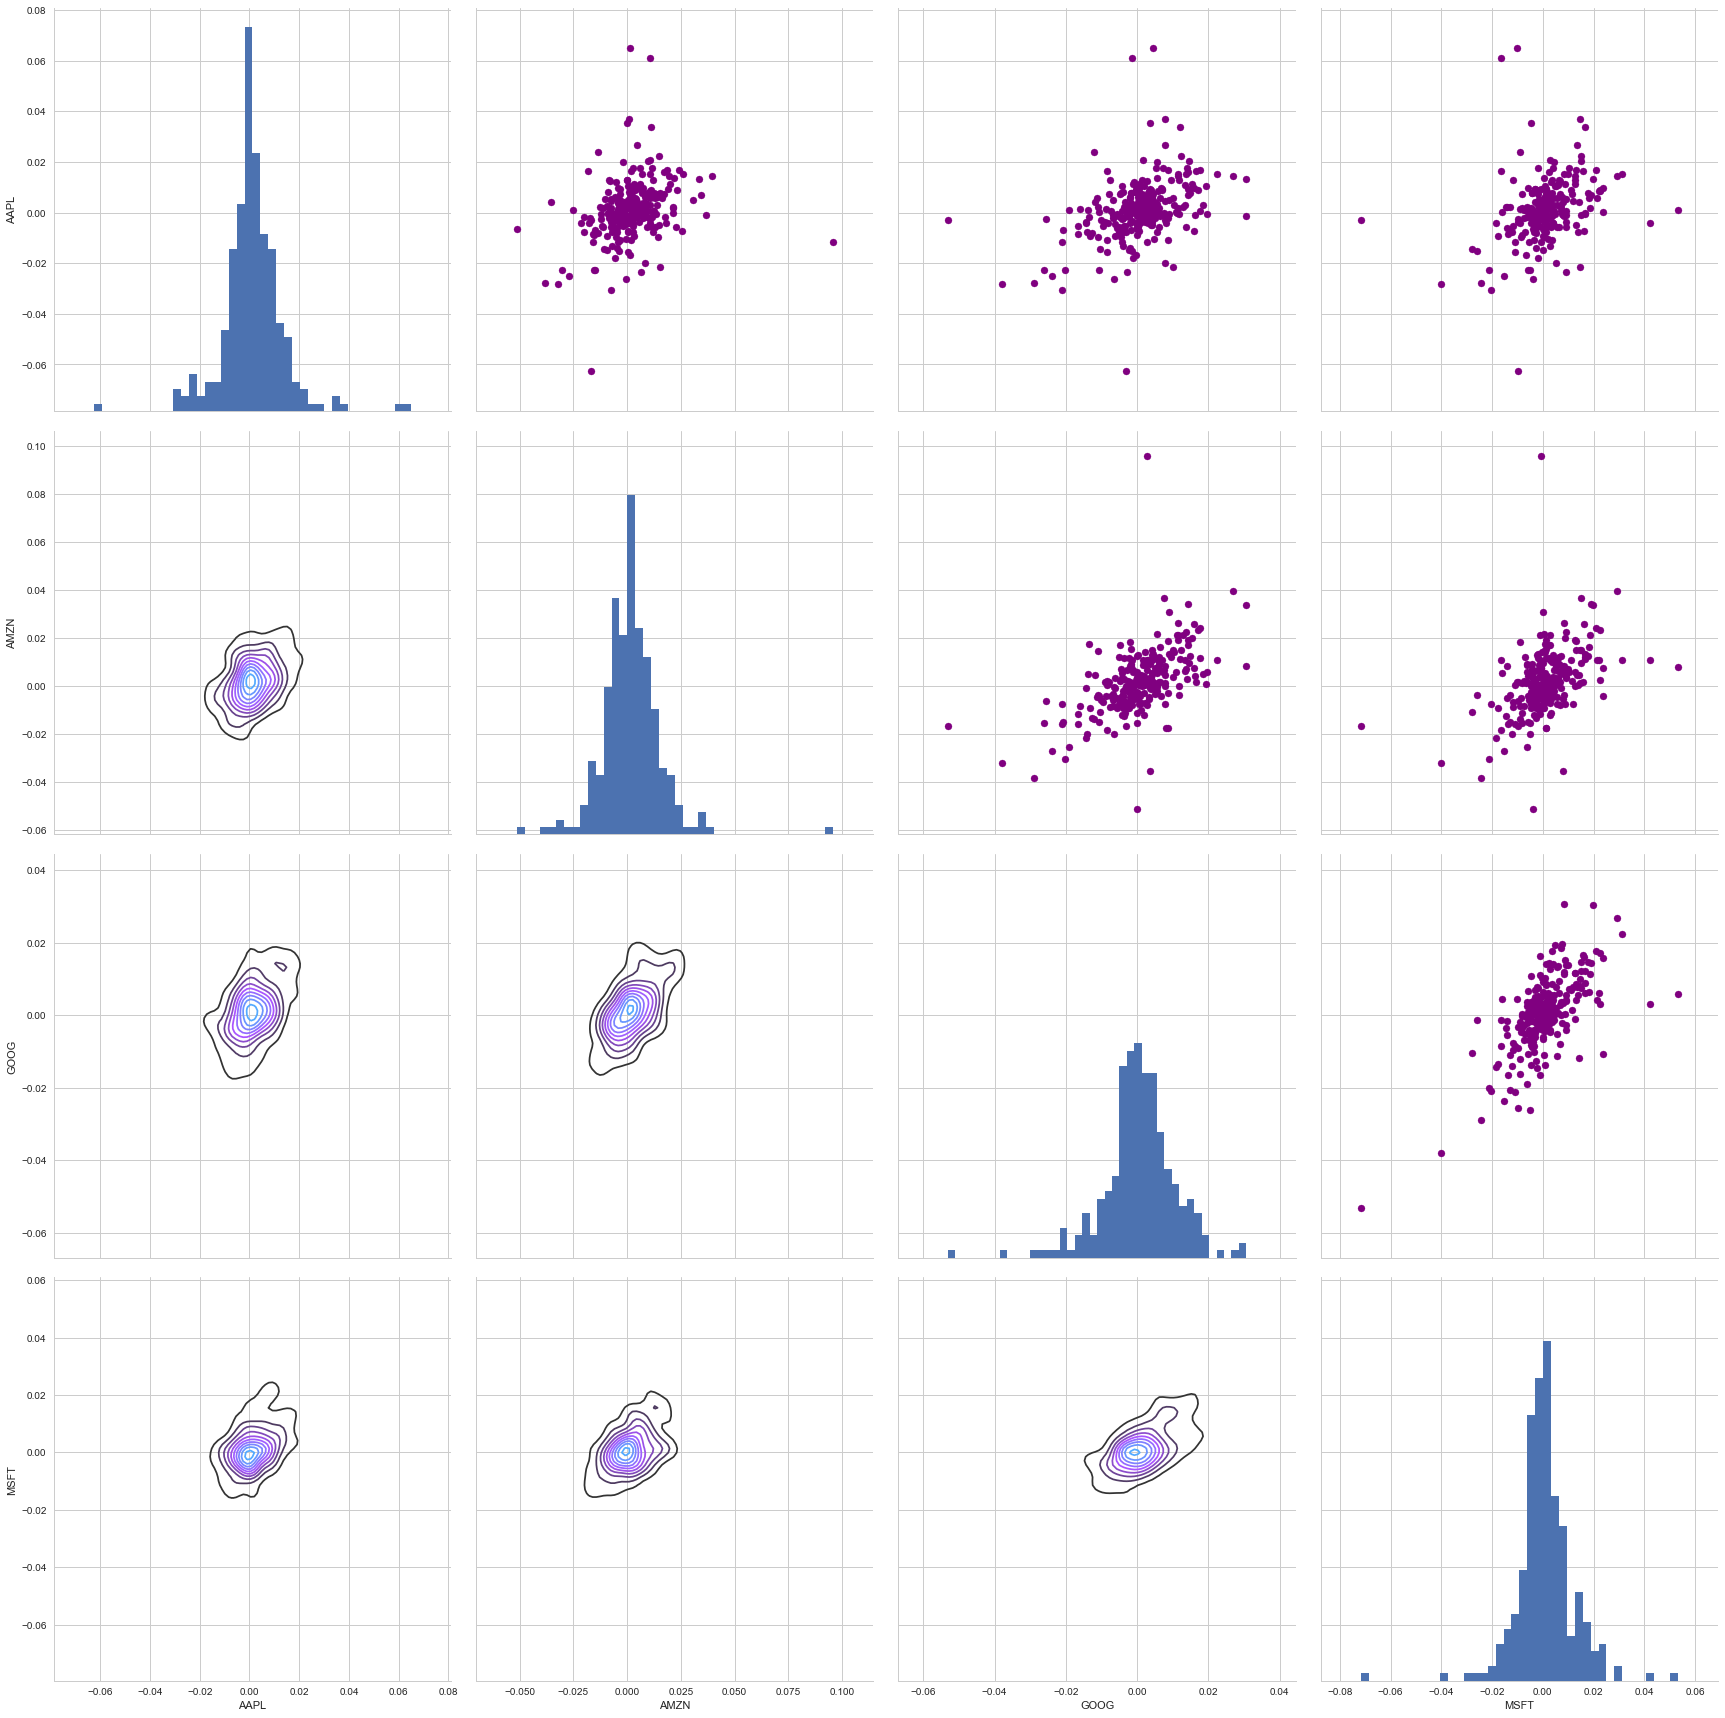

In [25]:
return_fig = sns.PairGrid(tech_rets.dropna(), size=6)

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=40)

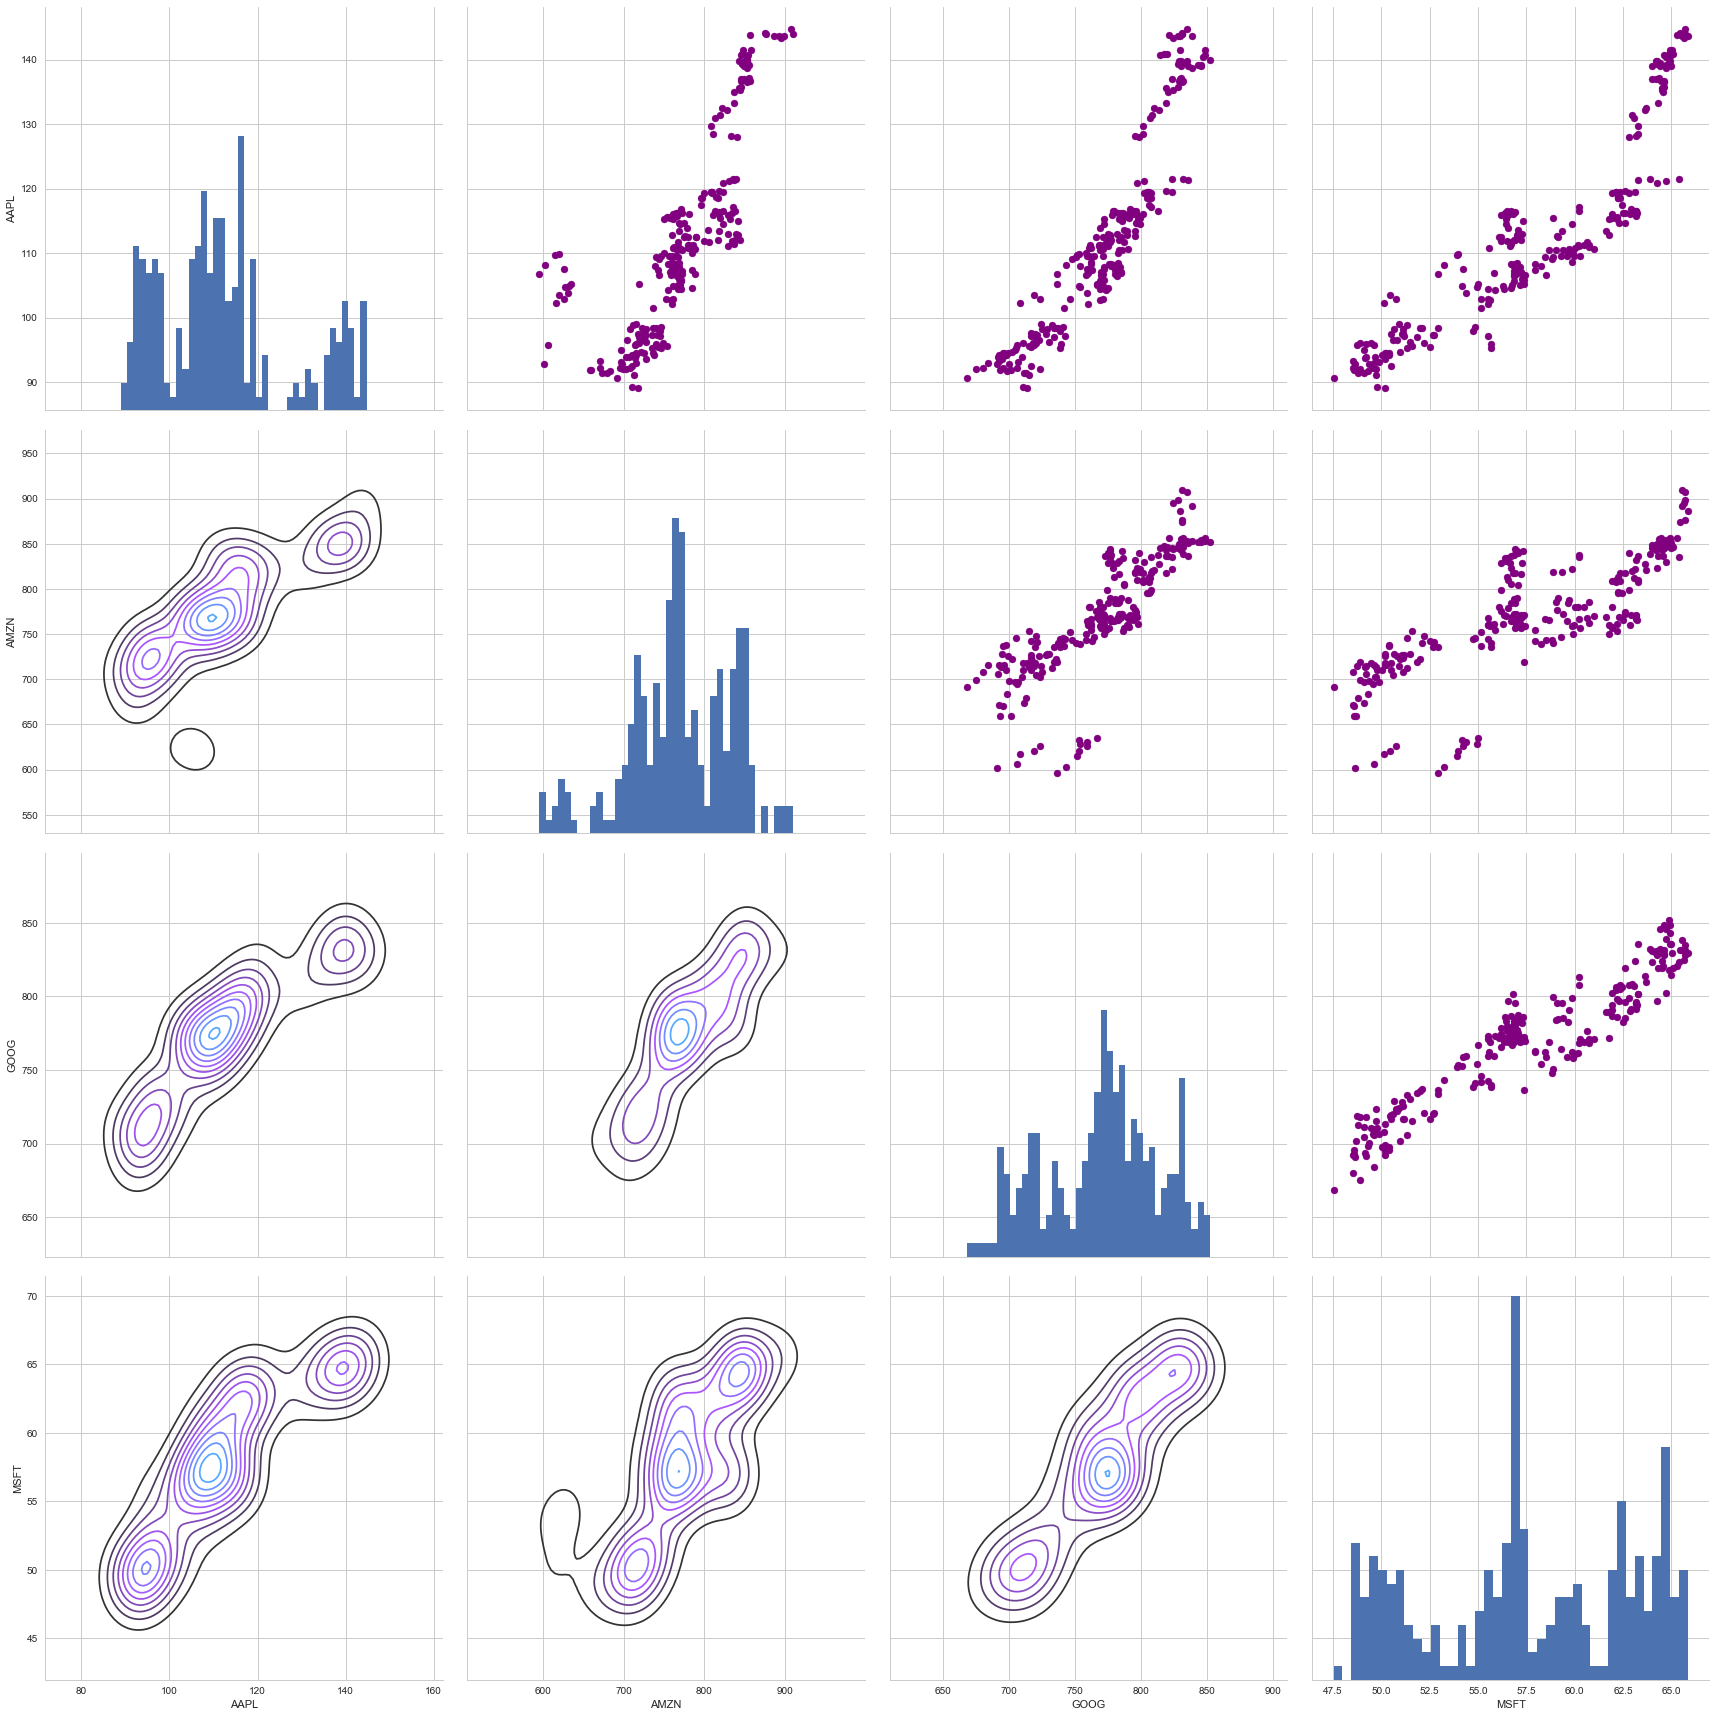

In [27]:
return_fig = sns.PairGrid(closing_df, size=6)

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=40)

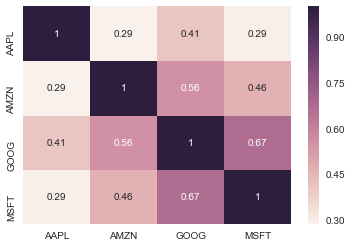

In [32]:
sns.heatmap(tech_rets.corr(), annot=True)

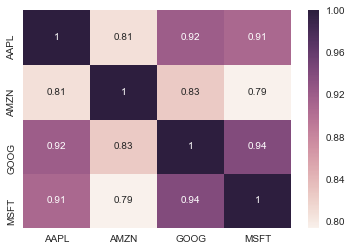

In [33]:
sns.heatmap(closing_df.corr(), annot=True)

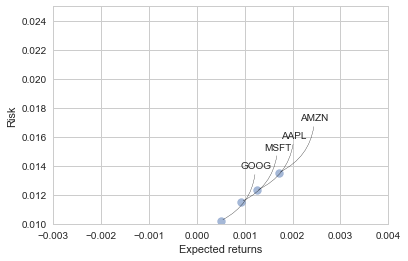

In [34]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

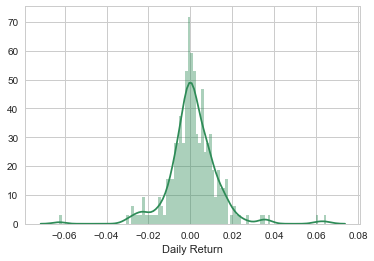

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='seagreen')

In [38]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-12,0.013025,0.012149,0.009496,0.006260
2016-04-13,0.014487,0.019315,0.011614,0.012809
2016-04-14,0.000535,0.009645,0.001969,0.000181
2016-04-15,-0.020071,0.008280,0.007700,0.005238
2016-04-18,-0.021575,0.015114,0.010026,0.014555


In [40]:
rets['GOOG'].quantile(0.05)

-0.016333458773614085

In [41]:
# Value at Risk using the Monte Carlo method

# Set up our time horizon
days = 365

# mu (drift) from the expected return data we got for MSFT
mu = rets.mean()['MSFT']

# sigma (shock) from the expected return data we got for MSFT
sigma = rets.std()['MSFT']

In [43]:
def stock_monte_carlo(start_price, mu, sigma, days):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    # Delta
    dt = 1/days
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Define drift adn shock array
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1, days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt)) 
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + price[x-1] * (drift[x] + shock[x])
    
    return price
        
        

In [45]:
MSFT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-11,54.490002,55.150002,54.299999,54.310001,21414200,52.918234
2016-04-12,54.369999,54.779999,53.759998,54.650002,24944300,53.249521
2016-04-13,55.119999,55.439999,54.889999,55.349998,20818000,53.931579
2016-04-14,55.220001,55.580002,55.070000,55.360001,20877100,53.941325
2016-04-15,55.299999,55.919998,55.110001,55.650002,28793800,54.223894


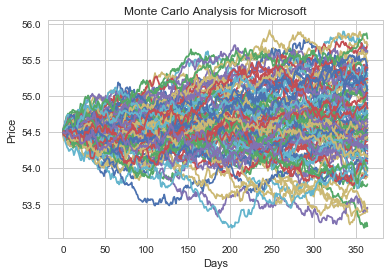

In [46]:
# Get the start_price from MSFT.head()
start_price = 54.49

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, mu, sigma, days))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Microsoft')

In [48]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, mu, sigma, days)[days -1]

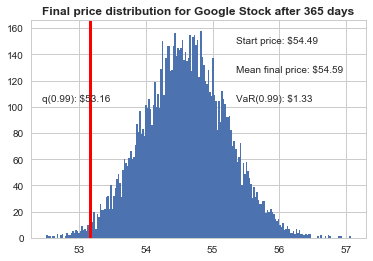

In [52]:
# Define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# plot distribution of end price
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: $%.2f' %start_price)

plt.figtext(0.6, 0.7, s='Mean final price: $%.2f' %simulations.mean())

plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' %(start_price - q))

plt.figtext(0.15, 0.6, s='q(0.99): $%.2f' %q)

plt.axvline(x=q, linewidth=3, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');